# Introduction

This Notebook is a result of exploratory data analysis (EDA) for ["LLM - Detect AI Generated Text"](https://www.kaggle.com/competitions/llm-detect-ai-generated-text).

 First of all, I would like to thank all the volunteers who have made various datasets available for this competition. I was initially puzzled by the paucity of data officially provided. However, thanks to the open data you have provided, I have enjoyed participating in this competition.

I browsed through the various source codes and listed the datasets used in them. I then decided to aggregate them and use them. I believe some of the participants are also planning to do so. However, aggregating data from many data sets requires attention to data duplication and quality. For example, which data comes from which data set, which data is overlapped with another, and to what extent.

Therefore, I created this notebook to visualize the relationships among the data sets and to see trends in the data after integration. Also I found that the vocabulary of AI-generated sentences was significantly less than that of student-written sentences. This is probably due to the nature of the generative AI, such as "generating word sequences with the highest probability of occurrence. 

In addition, I have added a list of frequent words used only by AIs and those used only by humans. Some frequent words used only humans are coming from typos such as "becuase", "becasue" and "driveless." As other participants have pointed out, focusing on typos may help to improve accuracy.

I am a newbie here, so you all may already know these things. But I would be happy if they are helpful!

## Purpose and usage of this notebook

The purpose of this notebook is two-fold. The first is to share a list of datasets as far as I know; the second is to visualize what differences occur in the aggregated data sets, such as the length of sentences and the distribution of vocabulary when you choose a combination of datasets.

For example, if you are using the DAIGT v2 dataset, you can see from the dataset diagram that falcon, mixtral, misral, etc. can be utilized as "new data" with no overlap with DAIGT v2. We can also see from the statistics in the second half of the notebook how the vocabulary used by humans and ai changes when these new datasets are added.

For example, to see the distribution of vocabulary for the DAIGT v2 dataset plus falcon, mixtral, and misral,
TRAIN_LIST = ["daigt", "falcon", "mixtral", "mistral7B"]
and then run the program.

In my experiments, I found that adding "augmented" to the dataset changed the distribution of the vocabulary significantly. This means that you should be a bit cautious when using aggregated data set which consists of "augmented".

**Change Logs:**

version 5: 
  - Added additional dataset (llm-mistral-7b-instruct-texts)
  - Modified dataset relation diagram to show aggregated data and all datasets
  
version 6:
  - Added additional dataset (Augmented data for LLM - Detect AI Generated Text) It's really huge!
  
version 7:
  - Added additional dataset (daigt-v4-train-dataset) Now,you can have 527720 unique essays!
  
version 8:
  - Added purpose and usage of this notebook
  - Changed logic for drawing dataset diagrams. Previously, the relationship between all datasets was always drawn, but after the change, the diagram changes according to the contents of TRAIN_LIST. 
  
  

# Import Libraries

In [1]:
!pip install mermaid-py > /null

/bin/bash: line 1: /null: Permission denied


In [9]:
# Data Handling and Processing
import pandas as pd
import numpy as np
import itertools

# Diagram Drawing
# !pip install mermaid-py > /null
import mermaid as md
from mermaid.graph import Graph

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Analysis
import string
import re

from pprint import pprint

# Data Aggregation Targets

In [5]:
# You can change combination of datasets for aggregation
#TRAIN_LIST = ["original", "daigt", "prompt7", "daigt_ex", "daigt_pr", "falcon", 
#              "mixtral", "claude", "palm", "persuade", "mistral7B", "augmented", "daigt-v4"]

# TRAIN_LIST = ["original", "daigt", "prompt7", "daigt_ex", "daigt_pr", "falcon", 
#               "mixtral", "claude", "palm", "persuade", "mistral7B", "augmented", "daigt-v4"]

TRAIN_LIST = ["original", "daigt"]

# Data Loading

In [6]:
data_dict = {}

# original competition data
test = pd.read_csv('../data/original/test_essays.csv')
df = pd.read_csv('../data/original/train_essays.csv')
df["source"] = ["original"] * len(df)
data_dict["original"] = df.rename(columns={'generated': 'label'})

# DAIGT v2 train dataset
df = pd.read_csv("../data/DAIGT_V2/train_v2_drcat_02.csv")
df["source"] = ["daigt"] * len(df)
data_dict["daigt"] = df.rename(columns={"prompt_name": "prompt_id"})

# # DAIGT external dataset
# df = pd.read_csv("/kaggle/input/daigt-external-dataset/daigt_external_dataset.csv")
# df_man = df.loc[:, ["text", "instructions"]]
# df_man["label"] = [0] * len(df_man)
# df_ai = df.loc[:, ["source_text", "instructions"]]
# df_ai = df_ai.rename(columns={'source_text': 'text'})
# df_ai["label"] = [1] * len(df_ai)
# df = pd.concat([df_man, df_ai], join='inner')
# df["source"] = ["daigt_ex"] * len(df)
# data_dic["daigt_ex"] = df.rename(columns={"instructions": "prompt_id"})

# # DAIGT proper train dataset
# df = pd.read_csv("/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv")
# df["source"] = ["daigt_pr"] * len(df)
# data_dic["daigt_pr"] = df.rename(columns={"prompt": "prompt_id"})

# # LLM 7 prompt training dataset
# df = pd.read_csv("/kaggle/input/llm-7-prompt-training-dataset/train_essays_RDizzl3_seven_v2.csv")
# df["source"] = ["prompt7"] * len(df)
# df["prompt_id"] = [0] * len(df)
# data_dic["prompt7"] = df.copy()

# # DAIGT data llama70b and falcon180b dataset
# df = pd.read_csv("/kaggle/input/daigt-data-llama-70b-and-falcon180b/llama_falcon_v3.csv")
# df = df.rename(columns={'generated': 'label'})
# df["source"] = ["falcon"] * len(df)
# data_dic["falcon"] = df.rename(columns={"prompt_name": "prompt_id"})

# # Mixtral 87b crafted essays dataset
# df = pd.read_csv("/kaggle/input/4k-mixtral87b-crafted-essays-for-detect-ai-comp/Mixtral8x7b_4k_essays_for_DetectAIGeneratedTextCompetition.csv")
# df["label"] = [1] * len(df)
# df["source"] = ["mixtral"] * len(df)
# data_dic["mixtral"] = df.rename(columns={'AI_Essay': 'text'})

# # Hello claude 1000 essays dataset
# df = pd.read_csv("/kaggle/input/hello-claude-1000-essays-from-anthropic/persuade15_claude_instant1.csv")
# df["label"] = [1] * len(df)
# df["source"] = ["claude"] * len(df)
# data_dic["claude"] = df.rename(columns={'essay_text': 'text'})

# # Google PaLM dataset
# df = pd.read_csv("/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv")
# df["source"] = ["palm"] * len(df)
# data_dic["palm"] = df.rename(columns={'generated': 'label'})

# # Persuade copus
# df = pd.read_csv("/kaggle/input/persaude-corpus-2/persuade_2.0_human_scores_demo_id_github.csv")
# df["label"] = [1] * len(df)
# df = df.rename(columns={"prompt_name": "prompt_id"})
# df["source"] = ["persuade"] * len(df)
# df = df.rename(columns={'prompt_name': 'prompt_id'})
# data_dic["persuade"] = df.rename(columns={'full_text': 'text'})

# # Mistral7B
# df = pd.read_csv("/kaggle/input/llm-mistral-7b-instruct-texts/Mistral7B_CME_v7_15_percent_corruption.csv")
# data_dic["mistral7B"] = df.rename(columns={'generated': 'label'})

# # Augmented data for LLM detect
# df_test = pd.read_csv("/kaggle/input/augmented-data-for-llm-detect-ai-generated-text/final_test.csv")
# df_train = pd.read_csv("/kaggle/input/augmented-data-for-llm-detect-ai-generated-text/final_train.csv")
# df = pd.concat([df_test, df_train], join="inner")
# df["source"] = ["augmented"] * len(df)
# df["prompt_id"] = [0] * len(df)
# data_dic["augmented"] = df.copy()

# # DAIGT-v4
# df = pd.read_csv("/kaggle/input/daigt-v4-train-dataset/train_v4_drcat_01.csv")
# data_dic["daigt-v4"] = df.rename(columns={'prompt_name': 'prompt_id'})


# Data aggregation
def aggregate_data(target_list):
    data_list = []
    for target in target_list:
        data_list.append(data_dict[target])
    out_data = pd.concat(data_list, join='inner')
    out_data = out_data.drop_duplicates(subset=["text"])
    out_data.reset_index(drop=True, inplace=True)
    return out_data

aggregated_train = aggregate_data(TRAIN_LIST)


# Show data prifiles
print("Data profiles:\n")
print("Loaded datasets:")
size_list = []
node_dic = {}
for target in data_dict.keys():
    size_list.append([target, len(data_dict[target])])
    node_dic[target] = target + ":" + str(len(data_dict[target]))
df = pd.DataFrame(size_list,columns=["dataset", "size"])
display(df)
print("Total size of loaded datasets: ", df["size"].sum())
print("\n\n")
print("Aggregated datasets: ", TRAIN_LIST)
print("Unique records in the aggregated datasets = ", len(aggregated_train))
print("\n\n")
print("Aggregated datasets sample:")
display(aggregated_train.head(3))


Data profiles:

Loaded datasets:


,dataset,size
0,original,1378
1,daigt,44868


Total size of loaded datasets:  46246



Aggregated datasets:  ['original', 'daigt']
Unique records in the aggregated datasets =  44868



Aggregated datasets sample:


,prompt_id,text,label,source
0,0,Cars. Cars have been around since they became ...,0,original
1,0,Transportation is a large necessity in most co...,0,original
2,0,"""America's love affair with it's vehicles seem...",0,original


# Dataset Relation

In [7]:
print("Dataset relations:")
print("Node: dataset name and size")
print()
relations = ""
#combinations = itertools.combinations(data_dic.keys(), 2)
#element_list = list(data_dic.keys())

combinations = itertools.combinations(TRAIN_LIST, 2)
element_list = list(TRAIN_LIST)

line_id = 0
for ds1, ds2 in combinations:
    dup1 = data_dict[ds1][data_dict[ds1]["text"].isin(data_dict[ds2]["text"])]
    if len(dup1) < 1:
        #print(ds1, "!!", ds2, len(dup1))
        pass
    elif len(dup1) == len(data_dict[ds1]):
        #print(ds1, "-->", ds2, len(dup1))
        relations += node_dic[ds1] + "-->|included|" + node_dic[ds2] + "\n"
        line_id += 1
        if ds1 in element_list:
            element_list.remove(ds1)
    else:
        dup2 = data_dict[ds2][data_dict[ds2]["text"].isin(data_dict[ds1]["text"])]
        if len(dup2) == len(data_dict[ds2]):
            #print(ds2, "-->", ds1, len(dup2))
            relations += node_dic[ds2] +"-->|included|" + node_dic[ds1] + "\n"
            line_id += 1
            if ds2 in element_list:
                element_list.remove(ds2)
        else:
            #print(ds1, "<->", ds2, len(dup2))
            relations += node_dic[ds1] + "-.-|overlapped " + str(len(dup2)) + "|" + node_dic[ds2] + "\n"
            relations += f"linkStyle {line_id} stroke:gray;\n"
            line_id += 1

aggregated_node = "aggregated_data:" + str(len(aggregated_train))
for ds in set(element_list):
    relations += node_dic[ds] + "-->" + aggregated_node + "\n"
    relations += f"linkStyle {line_id} stroke:royalblue;"
    line_id += 1
    
md_code = "graph TD;\n" + relations
graph = Graph("dataset relations", md_code)
md.Mermaid(graph)


Dataset relations:
Node: dataset name and size



# Comparing AI and Human Essays

In [10]:
df_ai = aggregated_train[aggregated_train["label"] == 1]
df_human = aggregated_train[aggregated_train["label"] == 0]
print("---------------------------------------------- : AI text sample : ----------------------------------------------")
pprint(df_ai.iloc[0]["text"])
print("\n\n")
print("---------------------------------------------- : Human text sample : ----------------------------------------------")
pprint(df_human.iloc[0]["text"])

---------------------------------------------- : AI text sample : ----------------------------------------------
('This essay will analyze, discuss and prove one reason in favor of keeping '
 'the Electoral College in the United States for its presidential elections. '
 'One of the reasons to keep the electoral college is that it is better for '
 'smaller, more rural states to have more influence as opposed to larger '
 'metropolitan areas that have large populations. The electors from these '
 'states are granted two votes each. Those from larger, more populated areas '
 'are granted just one vote each. Smaller states tend to hold significant '
 'power because their two votes for president and vice president add up more '
 'than the votes of larger states that have many electors. This is because of '
 'the split of the electoral votes. Some argue that electors are not bound to '
 'vote for the candidate who won the most votes nationally. They do not have '
 "to vote for their own stat

In [11]:
# Functions for Bar Graph

def add_value_label(plt, x_list, y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i], (i, y_list[i]), ha="center")

def show_bar_graph(labels, values, title, ylabel):
    plt.bar(labels, values, color=["coral", "lightgreen"])
    add_value_label(plt, labels, values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

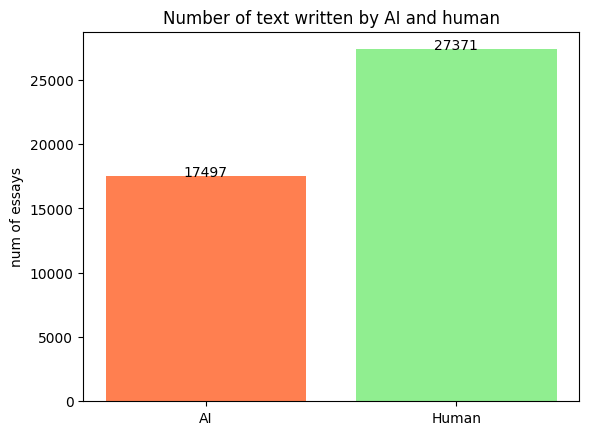

In [12]:
# Number of text written by AI and human
labels = ['AI', 'Human']
values = [len(df_ai), len(df_human)]

show_bar_graph(labels, values, "Number of text written by AI and human", "num of essays")

In [13]:
# Functions for Histograms

def show_histograms(df_ai, df_human, column):
    xmin = min(df_ai[column].min(), df_human[column].min())
    xmax = max(df_ai[column].max(), df_human[column].max())
    width = (xmax - xmin) / 100
    sns.histplot(df_ai[column], kde=False, color="coral", bins=np.arange(xmin, xmax, width))
    sns.histplot(df_human[column], kde=False, color="lightgreen", bins=np.arange(xmin, xmax, width))
    plt.legend(['ai', 'human'])
    plt.title('Overlaid histogram for {}'.format(column))
    plt.show()
    

AI text length samples:


,prompt_id,text,label,source,text_len
704,1,"This essay will analyze, discuss and prove one...",1,original,1356
740,1,I strongly believe that the Electoral College ...,1,original,1500
1262,0,"Limiting car use causes pollution, increases c...",1,original,1797



Human text length samples:


,prompt_id,text,label,source,text_len
0,0,Cars. Cars have been around since they became ...,0,original,3289
1,0,Transportation is a large necessity in most co...,0,original,2738
2,0,"""America's love affair with it's vehicles seem...",0,original,4428


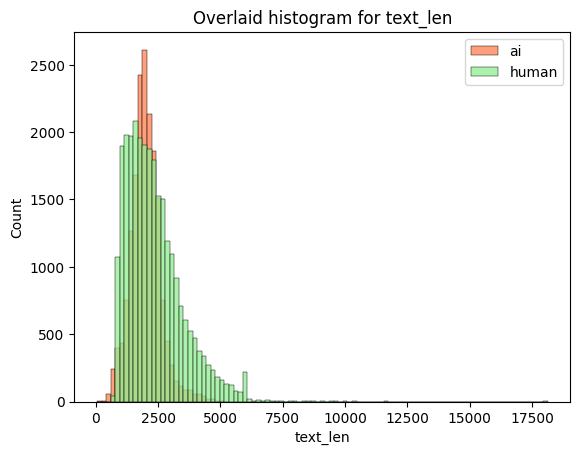

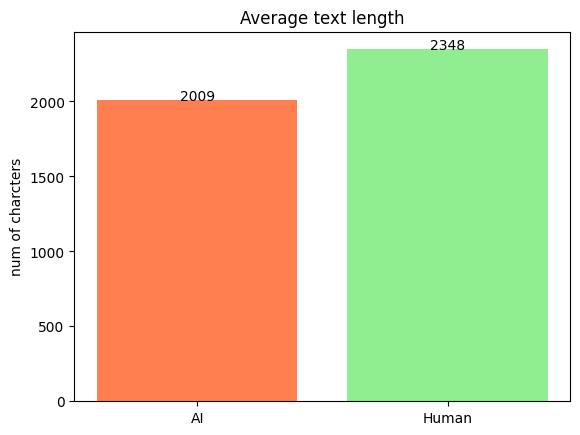

In [14]:
# Histogram for text length
df_ai.loc[:,["text_len"]] = df_ai["text"].apply(len)
df_human.loc[:,["text_len"]] = df_human["text"].apply(len)

print("AI text length samples:")
display(df_ai.head(3))
print()
print("Human text length samples:")
display(df_human.head(3))

show_histograms(df_ai, df_human, "text_len")

labels = ['AI', 'Human']
values = [int(df_ai["text_len"].sum()/len(df_ai)), int(df_human["text_len"].sum()/len(df_human))]

show_bar_graph(labels, values, "Average text length", "num of charcters")

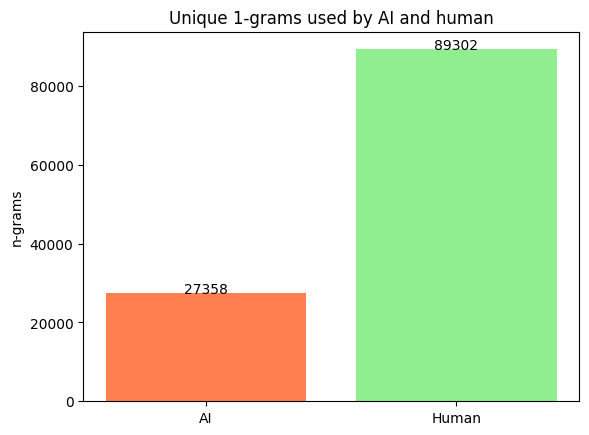

Top 10 1-grams only used by ai:


,1-gram,freq
0,zoos,859
1,four-day,849
2,eighth-grade,749
3,single-use,662
4,hillary,434
5,emerson,403
6,protections,387
7,winston,357
8,–,354
9,churchill,345



Top 10 1-grams only used by human:


,1-gram,freq
0,driveless,1148
1,becuase,831
2,thee,708
3,isnt,638
4,carfree,626
5,3-d,529
6,garvin,477
7,school_name,457
8,unrra,456
9,bomberger,381


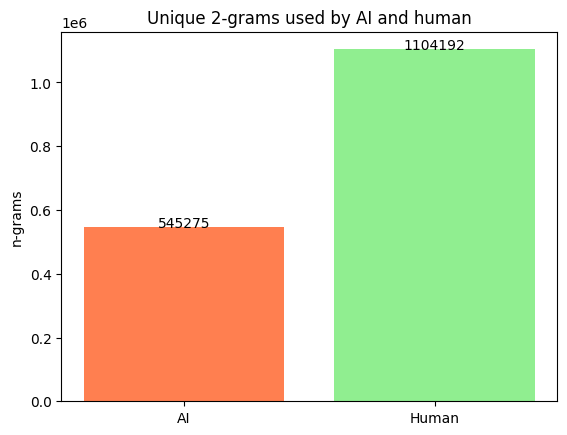

Top 10 2-grams only used by ai:


,2-gram,freq
0,like super,865
1,eighth-grade student,741
2,a four-day,741
3,an eighth-grade,740
4,respiratory problems,615
5,single-use plastics,590
6,state zip,544
7,address city,539
8,impressions are,505
9,failure can,504



Top 10 2-grams only used by human:


,2-gram,freq
0,in paragraph,2693
1,student designed,1064
2,dr huang,967
3,nasa is,832
4,car free,810
5,driveless cars,764
6,classroom computer,649
7,becoming confused,637
8,good opportunity,620
9,dont know,601


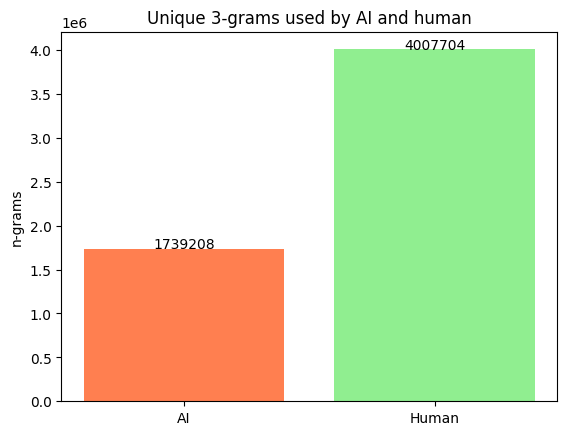

Top 10 3-grams only used by ai:


,3-gram,freq
0,sincerely your name,1830
1,writing to express,893
2,today to express,784
3,an eighth-grade student,740
4,as an eighth-grade,738
5,as an 8th,653
6,positive attitude is,651
7,eighth-grade student i,649
8,support for abolishing,619
9,express my support,579



Top 10 3-grams only used by human:


,3-gram,freq
0,is becoming confused,621
1,becoming confused or,614
2,a good opportunity,596
3,classroom computer could,583
4,good opportunity to,576
5,a classroom computer,575
6,modify the lesson,558
7,computer could recognize,539
8,a butte or,522
9,the text it,518


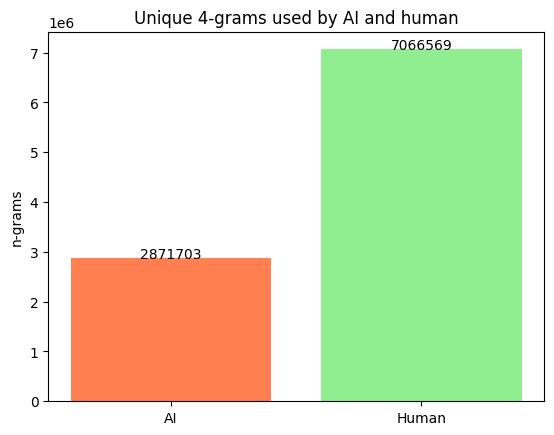

Top 10 4-grams only used by ai:


,4-gram,freq
0,writing to express my,893
1,am writing to express,890
2,a positive attitude can,878
3,today to express my,784
4,you today to express,781
5,as an eighth-grade student,738
6,ensures that the president,721
7,college and electing the,679
8,to reduce traffic congestion,670
9,an eighth-grade student i,649



Top 10 4-grams only used by human:


,4-gram,freq
0,a student is becoming,638
1,is becoming confused or,605
2,student is becoming confused,597
3,a good opportunity to,562
4,becoming confused or bored,552
5,could recognize when a,536
6,good opportunity to take,534
7,a classroom computer could,530
8,computer could recognize when,520
9,classroom computer could recognize,495


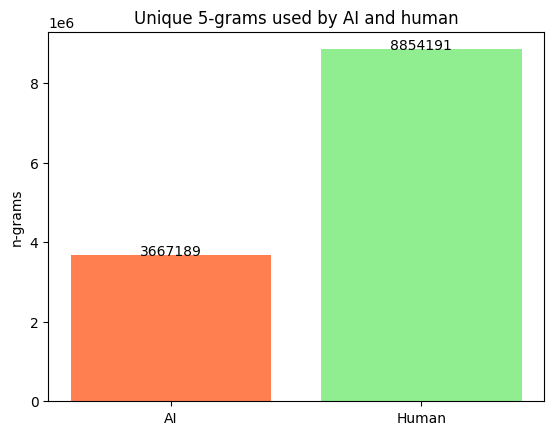

Top 10 5-grams only used by ai:


,5-gram,freq
0,i am writing to express,890
1,am writing to express my,890
2,that the president is elected,859
3,you today to express my,781
4,to you today to express,778
5,the electoral college and electing,693
6,electoral college and electing the,679
7,college and electing the president,679
8,as an eighth-grade student i,649
9,help to reduce traffic congestion,637



Top 10 5-grams only used by human:


,5-gram,freq
0,when a student is becoming,625
1,a student is becoming confused,590
2,student is becoming confused or,584
3,is becoming confused or bored,543
4,a good opportunity to take,525
5,good opportunity to take away,519
6,could recognize when a student,519
7,computer could recognize when a,511
8,classroom computer could recognize when,487
9,a classroom computer could recognize,452





CPU times: user 51.6 s, sys: 4.02 s, total: 55.6 s
Wall time: 54.8 s


In [15]:
%%time
# Unique n-gram Analysis

def get_unique_ngrams(df, n):
    unique_ngrams = set()
    ngram_freq = {}
    for text in df['text']:
        words = text.lower().split()  # Convert to lowercase and split into words
        words = [word.strip(string.punctuation) for word in words]
        ngrams = [" ".join(words[i:i+n]) for i in range(len(words) - n + 1)]
        unique_ngrams.update(set(ngrams))
        for ngram in ngrams:
            if ngram in ngram_freq.keys():
                ngram_freq[ngram] += 1
            else:
                ngram_freq[ngram] = 1
    return unique_ngrams, ngram_freq


def display_dic(dic, columns, n):
    sorted_dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(sorted_dic, columns=columns)
    display(df.head(n))
    return df


def show_unique_ngrams(n):
    unique_ngrams_ai, ngram_freq_ai = get_unique_ngrams(df_ai, n)
    unique_ngrams_human, ngram_freq_human = get_unique_ngrams(df_human, n)

    # Bar graph of unique words
    labels = ['AI', 'Human']
    values = [len(unique_ngrams_ai), len(unique_ngrams_human)]
    show_bar_graph(labels, values, f"Unique {n}-grams used by AI and human", "n-grams")

    ngrams_only_ai = set(unique_ngrams_ai) - set(unique_ngrams_human)
    ngram_freq_only_ai = {key: ngram_freq_ai[key] for key in ngram_freq_ai.keys() if key in ngrams_only_ai}
    ngrams_only_human = set(unique_ngrams_human) - set(unique_ngrams_ai)
    ngram_freq_only_human = {key: ngram_freq_human[key] for key in ngram_freq_human.keys() if key in ngrams_only_human}

    print(f"Top 10 {n}-grams only used by ai:")
    top_ngrams_ai = display_dic(ngram_freq_only_ai, [f"{n}-gram", "freq"], 10)
    print()
    print(f"Top 10 {n}-grams only used by human:")
    top_ngrams_human = display_dic(ngram_freq_only_human, [f"{n}-gram", "freq"], 10)
    return top_ngrams_ai, top_ngrams_human

max_gram = 5
top_ngram_dic = {}
top_ngram_dic["ai"] = {}
top_ngram_dic["human"] = {}
for n in range(1,max_gram + 1):
    only_ai, only_human = show_unique_ngrams(n)
    top_ngram_dic["ai"][str(n)] = only_ai
    top_ngram_dic["human"][str(n)] = only_human
    print("\n\n")